<a href="https://colab.research.google.com/github/dfariba/Aggregated-Wind-Farm-Power-Prediction-using-Statistical-Methods/blob/main/AutoReg_with_walking_forward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Aggregated Wind Farm Power Production Located in Belgium
Source of data: www.elia.be

Autoregression model with walking-forward

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# Load dataset
df_power = read_csv ('AggregatedWindFarm_Belgium.csv', header=0, index_col=0, parse_dates = True)

In [ ]:
# split dataset
X =  df_power.values
new_train, new_test = X[1:len(X)-7], X[len(X)-7:]

In [ ]:
# train autoregression
lag_window=29
ARmodel = AutoReg(new_train, lags=29)
ARmodel_fit = ARmodel.fit()
coef = ARmodel_fit.params

In [ ]:
# walk forward over time steps in test
history = new_train[len(new_train)-lag_window:]
history = [history[i] for i in range (len(history))]
new_predictions = list()

In [ ]:
for t in range(len(new_test)):
    length = len(history)
    lag = [history[i] for i in range (length-lag_window, length)]
    yhat = coef[0]
    for d in range(lag_window):
        yhat += coef[d+1] * lag[lag_window-d-1]
    obs = new_test[t]
    new_predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=2317.142189, expected=2405.150000
predicted=2502.070742, expected=2557.440000
predicted=2652.264531, expected=2673.720000
predicted=2745.490954, expected=2864.390000
predicted=2935.577468, expected=2908.050000
predicted=2920.273249, expected=2894.370000
predicted=2921.002091, expected=3003.240000


In [ ]:
rmse = sqrt(mean_squared_error(new_test, new_predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 69.282


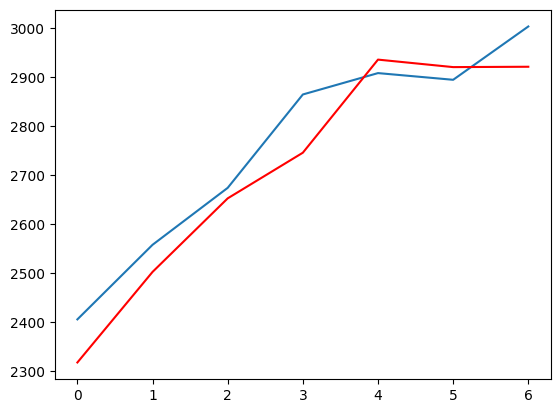

In [ ]:
# plot
pyplot.plot(new_test)
pyplot.plot(new_predictions, color='red')